# Izveštaj o prvom domaćem zadatku iz predmeta Mašinsko učenje
<hr>
**Viktor Todosijević br. indeksa 2021/3140**

Centriranje slika

In [17]:
from IPython.display import display, HTML
display(HTML("""
<style>
.output {
    display: flex;
    align-items: center;
    text-align: center;
}
</style>
"""))

Automatsko nabrajanje jednačina

In [18]:
# !pip install jupyter_contrib_nbextensions
# !jupyter contrib nbextension install --user
# !jupyter nbextension enable equation-numbering/main

In [19]:
%%javascript
MathJax.Hub.Config({
    TeX: { equationNumbers: { autoNumber: "AMS" } }
});

<IPython.core.display.Javascript object>

## Lokalno ponderisana linearna regresija

Neka je $x^* = (x_1,...,x_n)^T$ ulazni vektor za koji treba odrediti izlaz $y^*$, tada je

\begin{equation} \label{y_}
y^* = 
\begin{bmatrix}
1 \\
x^*
\end{bmatrix}^T \cdot \theta^*
\end{equation}

\begin{equation} \label{theta_}
\theta^* = (X^T W X)^{-1}X^T W y
\end{equation}

gde je $X$ matrica odbiraka trenirajućeg skupa podataka, $y$ vektor željenih izlaza, a $W$ težinska matrica data sa

\begin{equation} \label{W_mat}
W = diag\big(\omega^{(1)}, ... , \omega^{(m)}\big) \\
\end{equation}

\begin{equation} \label{omega_i}
\omega^{(i)} = exp\bigg(-\frac{||x^* - x^{(i)}||^2_2}{2\tau^2}\bigg)
\end{equation}

Odbirak $x^{(i)}$ je $i$-ti odbirak iz obučavajućeg skupa, $m$ broj odbiraka u tom skupu, a $\tau$ hiperparametar.

### Vizuelizacija u 1D i 2D prostoru

Demonstracija funkcionisanja metode na jednostavnim podacima u 1D i 2D prostoru. Trening podaci su napadnuti aditivnim belim Gausovim šumom, a test podaci su slučajno generisani.

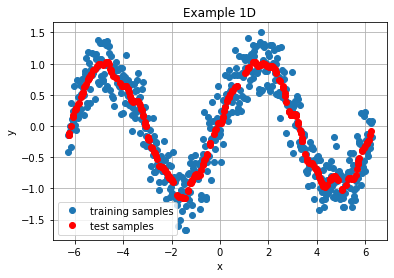

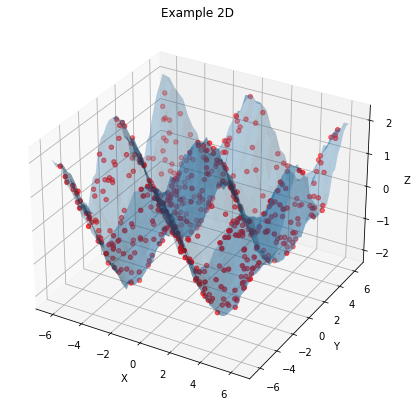

In [20]:
from example import example_1d, example_2d
example_1d()
example_2d()

### Validacija izostavljanjem

Skup podataka podeljen je na tri dela - obučavajući, validacioni i testirajući skup i to u odnosu 70:15:15. Obučavajući skup ulazi u sam algoritam dok validacioni služi za određivanje hiperparametra. Na testirajućem skupu se potvrđuju rezultati.

In [21]:
from data_loading import split_and_save

train_ratio = 0.7
val_ratio = 0.15

split_and_save('data.csv', train_ratio, val_ratio)

### Podešavanje hiperparametara

Parametar $\tau$ podešavamo tako da koren srednje kvadratne greške bude minimalan. Takvo $\tau$ pronalazimo pretragom po prostoru hiperparametra.

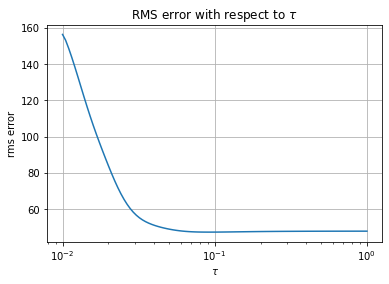

Lowest RMSError at tau_min_rms = 0.093, RMSError(tau_min_rms) = 47.28


In [22]:
from locally_weighted_lr import hyperparameter_search
hyperparameter_search()

### Provera modela na testirajućem skupu

In [23]:
import numpy as np
from data_loading import load_data
from model import model

y, x = load_data('data_test.csv')

y_ = model(x)

rms = np.sqrt(np.sum((y - y_) ** 2) / len(y))

print('RMSError = {:2.2f}'.format(rms))

RMSError = 55.76


Greska na testirajućem skupu je bliska onoj dobijenoj na validacionom.